# **THE COMPARISON OF DECISION TREE AND ENSEMBLE LEARNING FOR CANCELLATION PREDICTION USING HOTEL BOOKING DEMAND DATA**

---
NAME  : RAIHAN RAFIF

BATCH : HCK-001

# **I. INTRODUCTION**

Human mobility in this modern era has occurred on a wide range and scale. Today, people travel a lot from short distances to very long distances. Not infrequently they also stop at several locations and stay for a certain period of time. Surely those who travel and choose to stay a while need a place to stay. On that basis, there are many services that provide temporary housing or accommodation for people who are traveling and are far from their original place of residence. People usually stay in locations close to their destination. Therefore, the types of accommodation provided are also very diverse. Lodging can also be identified based on the location and condition of the inn. Hotels are one type of lodging that is widely used by people from all over the world. Usually, hotels are located in the center of human activity, be it in big cities, or near locations that have the attraction to be visited by many people. In addition, there are also types of lodging in the form of resorts. In general, actually, the resort does not have too much difference when viewed from the shape of the building. Usually, people distinguish a regular hotel from a rating based on the location and special facilities provided. Sorting is usually always associated with tourist locations with natural nuances such as mountains, beaches, highlands, and lakes, and usually, there are special supporting facilities such as special support facilities for tourism activities with related tourist sites. While hotels in general, are often found in cities where economic and government activities are carried out.

Before people use lodging services, they are required to book a room in order to make a reservation to ensure the availability of the room to be used. Currently, the forms and methods of reservation are very diverse, especially coupled with very rapid technological developments. Today, people who are just planning a trip can already make sure they have a place to stay before they even leave their homes. Of course, this form of the reservation is also applied to several requirements that must be met. Usually, the conditions that must be met are the submission of the identity of the customer and an advance that must be paid in advance to avoid fraudulent orders. Even if certain requirements have been met, there are often many unforeseen conditions that cause a reservation to be forced to be canceled.

The data used this time is accommodation reservation data in Portugal. There are two types of lodging, namely city hotels, and resorts. There is reservation data for inn guests with reservations between July 1, 2015, to August 31, 2017. There are 31 information available such as average daily rates, number of adult guests, travel agents who make bookings, date of arrival (check-in), month of arrival, week of arrival, year of arrival, type of room booked, code of room type booked, number of babies brought by guests, information regarding changes to reservations, number of children brought by guests, information on individuals or companies responsible for reservations made carried out, information on the region of ​​origin of the guest, the type of guest, information regarding the waiting list, information regarding deposits or advances, channel distributors, information on whether the visitor is a guest who has stayed or not, the distance between the day of booking and the day of arrival, market segment, facilities available meal plans, number of bookings that were not canceled prior to the current order, number of guests bookings canceled prior to the current booking, car park space reserved by guests, number of weekend nights (Saturday or Sunday) guests stayed, number of working days (Monday to Friday) guests stayed, number of special requests made by guests (e.g. beds twins or upper floors), reservation status, date when reservation status was assigned, as well as cancellation status of reservations made by guests.

## **1. Problem Statement**

Data says there are around 140 million bookings made to reserve a place to stay. It must be underlined, that this data only shows reservation data made using travel websites via the internet. While we know, that there are several other reservation methods that can be done. As is known, reservations can be made in two ways. First, make a reservation directly. Direct reservations are made when customers come directly to the location of the intended lodging. Then the second is an indirect reservation. There are various forms of indirect reservation. Indirect reservations can be made by telephone, email, and on the reservation website. This shows how much accommodation needs for various activities carried out by humans around the world. However, it is not uncommon for reservations to be canceled for several reasons. At first glance, this may not seem like a threat of loss. In fact, many service providers benefit from cancellation through the reservation method that applies a non-refundable down payment required if the reservation is canceled. However, the risk remains. If the need for lodging is high, the cancellation information may overlap with the information of other people who still need lodging. Moreover, currently, the majority of transactions are carried out through websites which also usually provide information regarding the availability of vacant rooms. If the cancellation and availability information is not done quickly, the possibility of losing customers can occur because they think that the inn has not provided vacant rooms at the time they need them.

## **2. Objective**

1. Perform cancellation prediction using decision tree machine learning model.
2. Perform cancellation prediction using ensemble machine learning model.
3. Compare the predicted results of machine learning models.
4. Perform model improvement for machine learning models with the best performance.

# **II. EXPLORATORY DATA ANALYSIS (EDA)**

## **1. Importing Libraries**

In [398]:
# Importing the libraries used
import pandas as pd
import numpy as np

#For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import phik

# For target data imbalanced handling
from imblearn.over_sampling import SMOTENC
from collections import Counter

# For ouliers handling
from feature_engine.outliers import Winsorizer

# For cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# For modeling problems
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# For model evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# For model improvement
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

# For data normalization and standarization
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# For pipeline building
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

# For model deployment
import pickle

# For ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **2. Loading The Data**

The data used is hotel booking demand data obtained through the kaggle.com platform via the link below:

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&language=Python

This data was created by Antonio *et al*. (2019) and published in the journal data in brief, Elsevier. Further information can be found at sciencedirect.com, or via the link below:

https://www.sciencedirect.com/science/article/pii/S2352340918315191

In [294]:
# Loading csv data into dataframe
df = pd.read_csv(r'D:\FTDS Boothcamp Hacktiv8\Phase 1\W4\Milestone 2\h8dsft_Milestone2P1_raihan_rafif.csv')

# Showing the dataframe
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [295]:
# Showing the data shape
df.shape

(119390, 32)

## **3. Data Dictionary**

|Variable|Type|Description|
|:-------|:------:|:-------|
|ADR|Numeric|Average Daily Rate|
|Hotel|Categorical|Type of the hotel|
|Adults|Categorical|Number of adults|
|Agent|Integer|ID of the travel agency that made the booking|
|ArrivalDateDayOfMonth|Integer|Day of the month of the arrival date|
|ArrivalDateMonth|Categorical|Month of arrival date with 12 categories: “January” to “December”|
|ArrivalDateWeekNumber|Integer|Week number of the arrival date|
|ArrivalDateYear|Integer|Year of arrival date|
|AssignedRoomType|Categorical|Code for the type of room assigned to the booking|
|Babies|Integer|Number of babies|
|BookingChanges|Integer|Number of changes made to the booking from the moment the booking was entered until the moment of check-in/cancellation|
|Children|Integer|Number of children|
|Company|Categorical|ID of the company/entity that made the booking or responsible for paying the booking|
|Country|Categorical|Country of origin|
|CustomerType|Categorical|Type of booking (Contract, Group, Transient, & Transient-party)|
|DaysInWaitingList|Integer|Number of days the booking was in the waiting list before it was confirmed to the customer|
|DepositType|Categorical|Indication on if the customer made a deposit to guarantee the booking (No Deposit, Non Refund, & Refundable)|
|DistributionChannel|Categorical|Booking distribution channel (Travel Agents & Tour Operators)|
|IsCanceled|Categorical|Value indicating if the booking was canceled (1) or not (0)|
|IsRepeatedGuest|Categorical|Value indicating if the booking name was from a repeated guest (1) or not (0)|
|LeadTime|Integer|Number of days that elapsed between the entering date of the booking into the arrival date|
|MarketSegment|Categorical|Market segment designation (Travel Agents & Tour Operators)|
|Meal|Categorical|Type of meal booked (Undefined/SC, Bed & Breakfast/BB, & Half board/HB)|
|PreviousBookingsNotCanceled|Integer|Number of previous bookings not cancelled by the customer prior to the current booking|
|PreviousCancellations|Integer|Number of previous bookings that were cancelled by the customer prior to the current booking|
|RequiredCardParkingSpaces|Integer|Number of car parking spaces required by the customer|
|ReservationStatus|Categorical|Reservation last status (Canceled, Check-Out, & No-Show)|
|ReservationStatusDate|Date|Date at which the last status was set|
|ReservedRoomType|Categorical|Code of room type reserved|
|StaysInWeekendNights|Integer|Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel|
|StaysInWeekNights|Integer|Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|TotalOfSpecialRequests|Integer|Number of special requests made by the customer (e.g. twin bed or high floor)|

## **4. Explorations**

**CANCELLATION EVENTS**

---

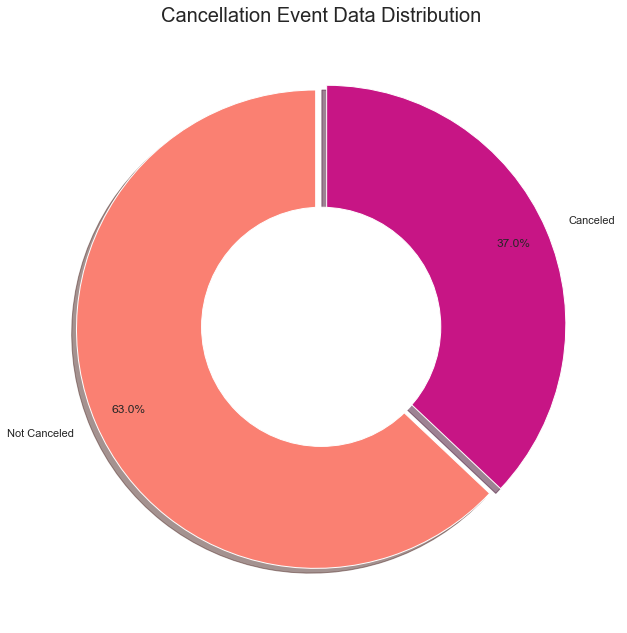

In [296]:
# Identifying target data distribution
# Setting figure size
plt.figure(figsize = (15, 11))
# Set seaborn plotting aesthetics as default
sns.set()
# Defining colors, explotion, and labels
explode = (0.025, 0.025)
data = df['is_canceled']
colors = ['salmon', 'mediumvioletred']
labels = ['Not Canceled', 'Canceled']
# Creating pie chart
plt.pie(data.value_counts(),
        labels = labels,
        colors = colors,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 90,
        pctdistance=0.85,
        explode = explode
)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Setting title
plt.title('Cancellation Event Data Distribution', fontsize = 20)
# Showing the plot
plt.show()

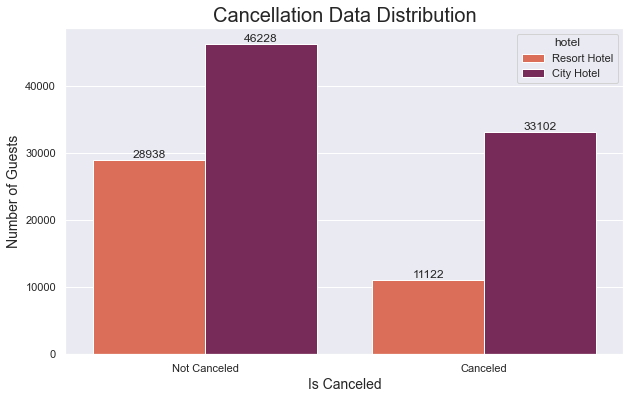

In [297]:
# Identifying target data distribution
# Setting figure size
plt.figure(figsize = (10, 6))
# Set seaborn plotting aesthetics as default
sns.set()
# Count plotting
cancel = sns.countplot(data = df,
                       x = 'is_canceled',
                       hue = 'hotel',
                       palette = 'rocket_r'
)
# Showing count number
cancel.bar_label(cancel.containers[0], label_type = 'edge')
cancel.bar_label(cancel.containers[1], label_type = 'edge')
#Setting title and labels
plt.xticks([0,1], ['Not Canceled', 'Canceled'])
plt.title("Cancellation Data Distribution", fontsize = 20)
plt.xlabel("Is Canceled", fontsize = 14)
plt.ylabel("Number of Guests", fontsize = 14)
# Showing the plot
plt.show()

**AVERAGE DAILY RATE**

---

In [298]:
# Assigning new variable
ranged_adr = df.copy()
# Making average daily rate data range
ranged_adr["adr"] = pd.cut(ranged_adr["adr"], [-10, 95, 200, 5400])

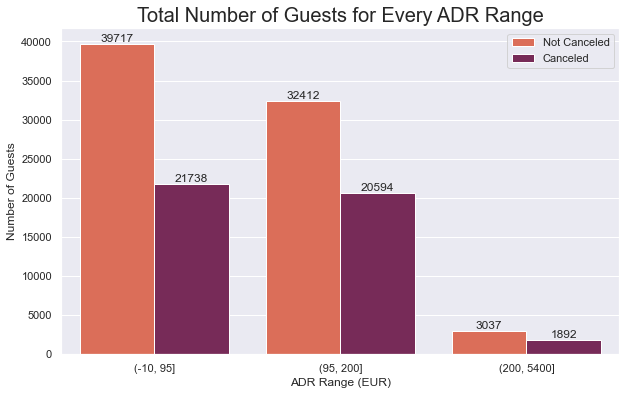

In [299]:
# Total number of guests for every average daily rate range
# Setting figure size
plt.figure(figsize = (10, 6))
# Sets seaborn aesthetics as default
sns.set()
# Count plotting
range =sns.countplot(data = ranged_adr,
                    x = "adr",
                    hue = "is_canceled",
                    palette = "rocket_r"
)
# Showing count number
range.bar_label(range.containers[0], label_type = "edge")
range.bar_label(range.containers[1], label_type = "edge")
# Setting title, labels and legend
plt.title("Total Number of Guests for Every ADR Range", fontsize = 20)
plt.xlabel("ADR Range (EUR)")
plt.ylabel("Number of Guests")
plt.legend(["Not Canceled", "Canceled"])
# Showing the plot
plt.show()

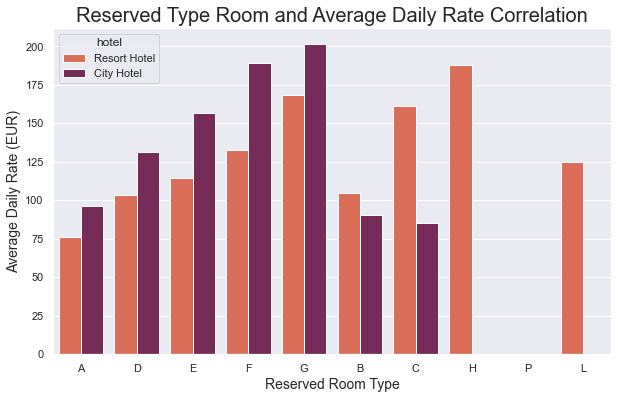

In [300]:
# Room type vs.average daily rate
# Setting figure size
plt.figure(figsize = (10, 6))
# Sets seaborn aesthetics as default
sns.set()
# Bar plotting
sns.barplot(data = df,
            x = 'reserved_room_type',
            y = 'adr',
            order = pd.value_counts(df['reserved_room_type']).iloc[:10].index,
            hue = 'hotel',
            palette = 'rocket_r',
            ci = None
)
# Setting title and labels
plt.title('Reserved Type Room and Average Daily Rate Correlation', fontsize = 20)
plt.xlabel('Reserved Room Type', fontsize = 14)
plt.ylabel('Average Daily Rate (EUR)', fontsize = 14)

# Showing the plot
plt.show()

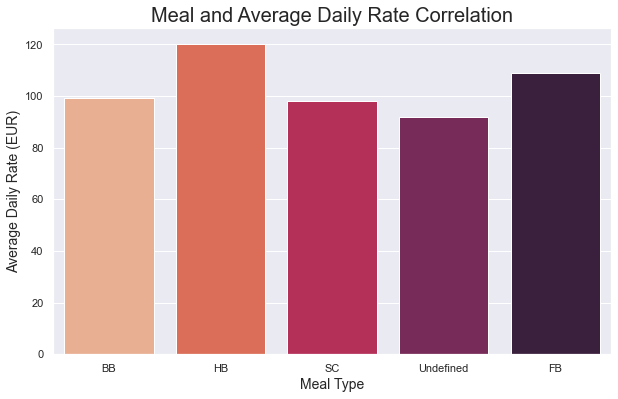

In [301]:
# Meal vs.average daily rate
# Setting figure size
plt.figure(figsize = (10, 6))
# Sets seaborn aesthetics as default
sns.set()
# Bar plotting
sns.barplot(data = df,
            x = 'meal',
            y = 'adr',
            order = pd.value_counts(df['meal']).iloc[::].index,
            palette = 'rocket_r',
            ci = None
)
# Setting title and labels
plt.title('Meal and Average Daily Rate Correlation', fontsize = 20)
plt.xlabel('Meal Type', fontsize = 14)
plt.ylabel('Average Daily Rate (EUR)', fontsize = 14)

# Showing the plot
plt.show()

**TOP 10 GUESTS ORIGIN COUNTRY**

---

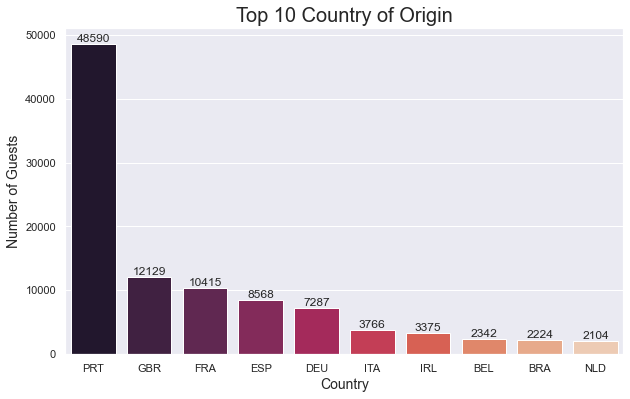

In [302]:
# Top 10 guests origin country
# Setting figure size
plt.figure(figsize = (10, 6))
# Set seaborn plotting aesthetics as default
sns.set()
# Bar plotting
country = sns.countplot(data = df,
                        x = 'country',
                        order = pd.value_counts(df['country']).iloc[:10].index,
                        palette = 'rocket'
)
# Showing count number
country.bar_label(country.containers[0], label_type = 'edge')
# Setting labels and title
plt.title('Top 10 Country of Origin', fontsize = 20)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Number of Guests', fontsize = 14)
# Show the plot
plt.show()

**THE DYNAMIC OF RESERVED AND CANCELLATION**

---

In [303]:
# Extracting not canceled reservation im every hotel type
resort = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [304]:
# Making date order by month
# Assigning date(month) feature into a new variable
# Resort hotel
resort_month = resort.groupby("arrival_date_month")["hotel"].count()
# City hotel
city_month = city.groupby("arrival_date_month")["hotel"].count()
# Converting previous variables into dataframe
# Resort data
resDat = pd.DataFrame({"month" : list(resort_month.index),
                       "hotel" : "Resort Hotel",
                       "guests" : list(resort_month.values)})
# City hotel data
citDat = pd.DataFrame({"month" : list(city_month.index),
                       "hotel" : "City Hotel",
                       "guests" : list(city_month.values)})
# Merging all new data into 1 dataframe using concat function
hotelAll = pd.concat([resDat, citDat], ignore_index = True)
# Making month order
order = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]
# Changing the data type of month feature in hotelAll data
hotelAll["month"] = pd.Categorical(hotelAll["month"], categories = order, ordered = True)
# The data contains 2 months (July and August) that have more than 1 population from another years
# Normalized the data
hotelAll.loc[(hotelAll["month"] == "July") | (hotelAll["month"] == "August"), "guests"]/=3
hotelAll.loc[(hotelAll["month"] == "July") | (hotelAll["month"] == "August"), "guests"]/=2

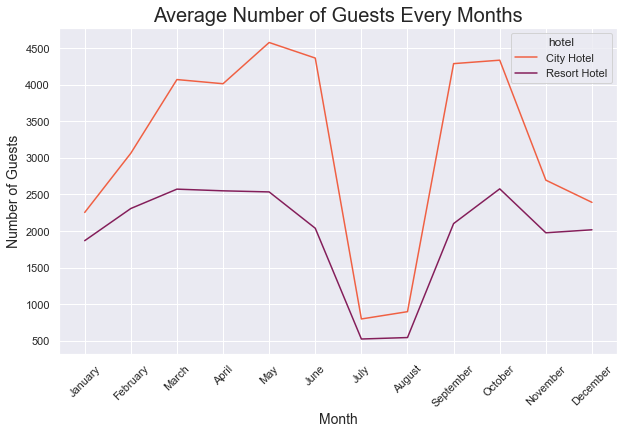

In [305]:
# Average number of guests every months
# Setting figuresize
plt.figure(figsize=(10, 6))
# Sets seaborn aesthetics as default
sns.set()
# Line plotting
sns.lineplot(data = hotelAll,
             x = "month",
             y = "guests",
             hue = "hotel",
             hue_order = ["City Hotel", "Resort Hotel"],
             palette = "rocket_r"
)
# Setting title and labels
plt.title("Average Number of Guests Every Months", fontsize = 20)
plt.xlabel("Month", fontsize = 14)
plt.ylabel("Number of Guests", fontsize = 14)
plt.xticks(rotation = 45)
# Showing the plot
plt.show()

In [306]:
# Extracting canceled reservation im every hotel type
resort_can = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 1)]
city_can = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 1)]

In [307]:
# Making date order by month
# Assigning date(month) feature into a new variable
# Resort hotel
resMonth_can = resort_can.groupby("arrival_date_month")["hotel"].count()
# City hotel
citMonth_can = city_can.groupby("arrival_date_month")["hotel"].count()
# Converting previous variables into dataframe
# Resort data
resDat_can = pd.DataFrame({"month" : list(resMonth_can.index),
                       "hotel" : "Resort Hotel",
                       "guests" : list(resMonth_can.values)})
# City hotel data
citDat_can = pd.DataFrame({"month" : list(citMonth_can.index),
                       "hotel" : "City Hotel",
                       "guests" : list(citMonth_can.values)})
# Merging all new data into 1 dataframe using concat function
hotelAll_can = pd.concat([resDat_can, citDat_can], ignore_index = True)
# Making month order
order = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]
# Changing the data type of month feature in hotelAll_can data
hotelAll_can["month"] = pd.Categorical(hotelAll_can["month"], categories = order, ordered = True)
# The data contains 2 months (July and August) that have more than 1 population from another years
# Normalized the data
hotelAll_can.loc[(hotelAll_can["month"] == "July") | (hotelAll_can["month"] == "August"), "guests"]/=3
hotelAll_can.loc[(hotelAll_can["month"] == "July") | (hotelAll_can["month"] == "August"), "guests"]/=2

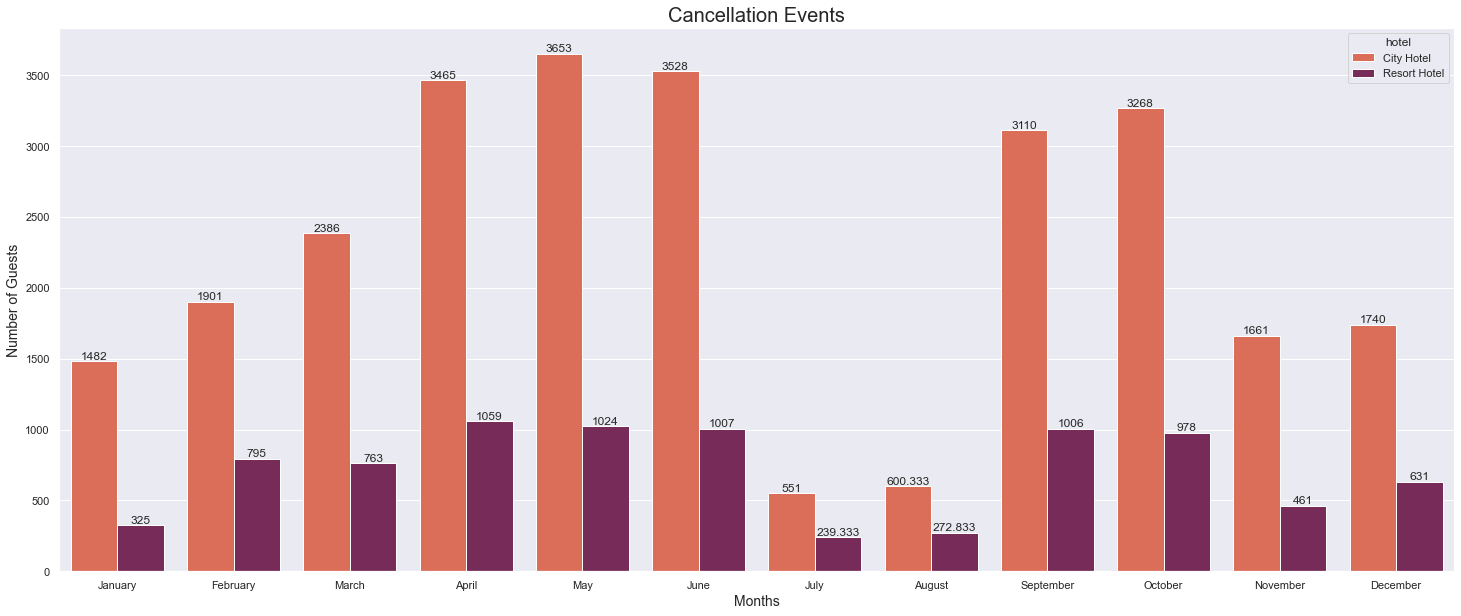

In [308]:
# cancellation events
# Setting figure size
plt.figure(figsize = (25, 10))
# Set seaborn plotting aesthetics as default
sns.set()
# Bar plotting
cancel = sns.barplot(data = hotelAll_can,
                        x = 'month',
                        y = 'guests',
                        hue = 'hotel',
                        hue_order = ['City Hotel', 'Resort Hotel'],
                        palette = 'rocket_r'
)
# Showing count number
cancel.bar_label(cancel.containers[0], label_type = 'edge')
cancel.bar_label(cancel.containers[1], label_type = 'edge')
# Setting labels and title
plt.title('Cancellation Events', fontsize = 20)
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Number of Guests', fontsize = 14)
# Show the plot
plt.show()

**SEVERAL FEATURES EFFECT ON CANCELLATION EVENTS**

---

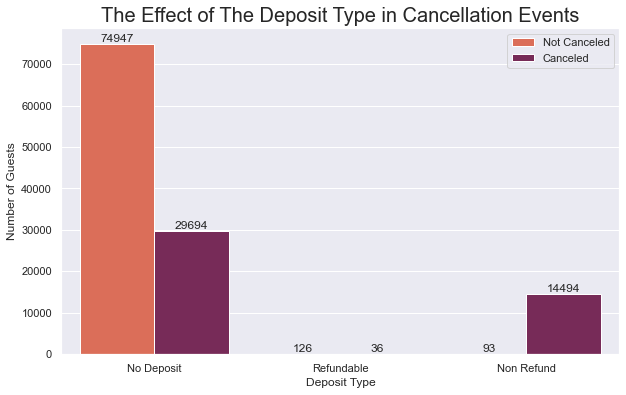

In [309]:
# The effect of the deposit type in cancellation events
# Setting figure size
plt.figure(figsize = (10, 6))
# Sets seaborn aesthetics as default
sns.set()
# Count plotting
depo =sns.countplot(data = df,
                    x = "deposit_type",
                    hue = "is_canceled",
                    palette = "rocket_r"
)
# Showing count number
depo.bar_label(depo.containers[0], label_type = "edge")
depo.bar_label(depo.containers[1], label_type = "edge")
# Setting title, labels and legend
plt.title("The Effect of The Deposit Type in Cancellation Events", fontsize = 20)
plt.xlabel("Deposit Type")
plt.ylabel("Number of Guests")
plt.legend(["Not Canceled", "Canceled"])
# Showing the plot
plt.show()

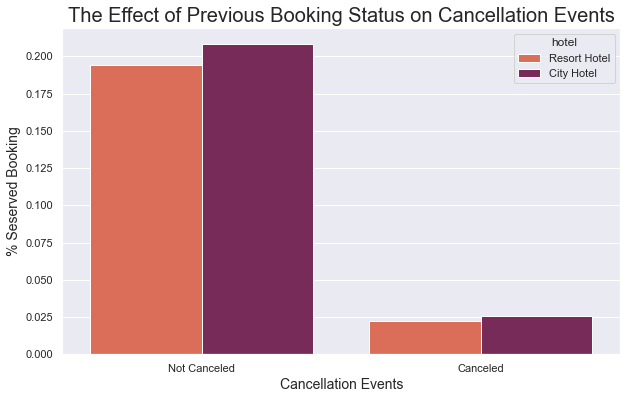

In [310]:
# The effect of previous booking status on cancellation events
# Setting figure size
plt.figure(figsize = (10, 6))
# Sets seaborn aesthetics as default
sns.set()
# Bar plotting
booked = sns.barplot(data = df,
                     x = 'is_canceled',
                     y = 'previous_bookings_not_canceled',
                     hue = 'hotel',
                     palette = 'rocket_r',
                     ci = None
)
# Setting title and labels
plt.title('The Effect of Previous Booking Status on Cancellation Events', fontsize = 20)
plt.xlabel('Cancellation Events', fontsize = 14)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.ylabel('% Seserved Booking', fontsize = 14)

# Showing the plot
plt.show()

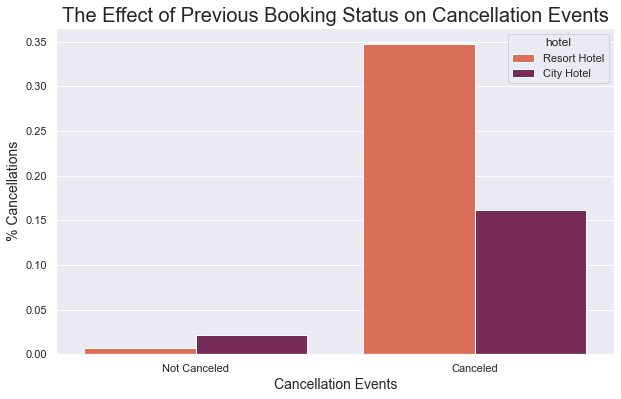

In [311]:
# The effect of previous booking status on cancellation events
# Setting figure size
plt.figure(figsize = (10, 6))
# Sets seaborn aesthetics as default
sns.set()
# Bar plotting
booked = sns.barplot(data = df,
                     x = 'is_canceled',
                     y = 'previous_cancellations',
                     hue = 'hotel',
                     palette = 'rocket_r',
                     ci = None
)
# Setting title and labels
plt.title('The Effect of Previous Booking Status on Cancellation Events', fontsize = 20)
plt.xlabel('Cancellation Events', fontsize = 14)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.ylabel('% Cancellations', fontsize = 14)

# Showing the plot
plt.show()

**DATA MANIPULATIONS**

---

In [312]:
# Showing statistical information of the data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [313]:
# Showing general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [314]:
# Dropping unnessecary column
df.drop(['reservation_status_date'], axis = 1, inplace = True)

In [315]:
# Checking if some rows contain entreis with 0 adults, 0 children and 0 babies
noGuests = list(df.loc[df["adults"] + df["children"] + df["babies"] == 0].index)
# Showing the result
noGuests_df = pd.DataFrame(noGuests)
noGuests_df.shape

(180, 1)

In [316]:
# Dropping these entries with no guests
df.drop(df.index[noGuests], axis = 0, inplace = True)

In [317]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df[df.duplicated(keep = 'first')]
# Showing the result
duplicate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out


In [318]:
# Dropping dupilicated rows and keep the first one
df.drop_duplicates(keep = 'first', inplace = True)

In [319]:
# Reset Index
df.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86980,119385,City Hotel,0,23,2017,August,35,30,2,5,...,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out
86981,119386,City Hotel,0,102,2017,August,35,31,2,5,...,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out
86982,119387,City Hotel,0,34,2017,August,35,31,2,5,...,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out
86983,119388,City Hotel,0,109,2017,August,35,31,2,5,...,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out


In [320]:
# Checking shape of the data
df.shape

(86985, 31)

In [321]:
# Meal contain value undefined which has the same value as SC
df["meal"].replace("Undefined", "SC", inplace = True)

# **III. DATA PREPROCESSING**

## **1. Missing Values Handling**

In [322]:
# Identifying possible missing values
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             446
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12112
company                           81757


No missing values handling is carried out because columns containing missing values will not be used in the model.

## **2. Inference Data Extraction**

In [323]:
# Slicing the first 10 rows for making the inference data
df_inf = df.sample(10, random_state = 42)
# Showing the inference data
df_inf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
45568,City Hotel,1,233,2015,November,45,7,1,1,2,...,0,No Deposit,1.0,NaN,0,Transient-Party,60.00,0,0,Canceled
105054,City Hotel,0,27,2017,January,4,24,0,5,3,...,0,No Deposit,9.0,NaN,0,Transient,108.38,0,2,Check-Out
35762,Resort Hotel,0,96,2017,April,17,29,1,1,2,...,1,No Deposit,250.0,NaN,0,Transient,80.00,1,1,Check-Out
63560,City Hotel,1,6,2017,February,7,14,0,1,2,...,0,No Deposit,9.0,NaN,0,Transient,108.00,0,0,Canceled
104253,City Hotel,0,49,2017,January,1,5,1,3,2,...,0,No Deposit,9.0,NaN,0,Transient,105.90,0,2,Check-Out


In [324]:
# Dropping the inference data from the model data
df = df.drop(df_inf.index)

In [325]:
# Reset Index
df_inf.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,45568,City Hotel,1,233,2015,November,45,7,1,1,...,0,No Deposit,1.0,NaN,0,Transient-Party,60.00,0,0,Canceled
1,105054,City Hotel,0,27,2017,January,4,24,0,5,...,0,No Deposit,9.0,NaN,0,Transient,108.38,0,2,Check-Out
2,35762,Resort Hotel,0,96,2017,April,17,29,1,1,...,1,No Deposit,250.0,NaN,0,Transient,80.00,1,1,Check-Out
3,63560,City Hotel,1,6,2017,February,7,14,0,1,...,0,No Deposit,9.0,NaN,0,Transient,108.00,0,0,Canceled
4,104253,City Hotel,0,49,2017,January,1,5,1,3,...,0,No Deposit,9.0,NaN,0,Transient,105.90,0,2,Check-Out
5,91797,City Hotel,0,265,2016,June,26,24,0,2,...,1,No Deposit,6.0,NaN,0,Transient-Party,87.00,0,0,Check-Out
6,25144,Resort Hotel,0,26,2017,May,22,30,0,1,...,0,No Deposit,NaN,154.0,0,Transient,45.00,0,0,Check-Out
7,95856,City Hotel,0,4,2016,August,35,21,2,2,...,1,No Deposit,9.0,NaN,0,Transient,128.00,0,1,Check-Out
8,117812,City Hotel,0,3,2017,August,32,7,1,2,...,0,No Deposit,9.0,NaN,0,Transient,169.00,0,0,Check-Out
9,50098,City Hotel,1,70,2016,April,17,23,1,1,...,0,No Deposit,9.0,NaN,0,Transient,94.50,0,0,Canceled


In [326]:
# Show the data shape
df.shape

(86975, 31)

## **3. Training and Testing Data Separation**

In [327]:
# Train and test split using stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["is_canceled"]):
    strat_train = df.iloc[train_index]
    strat_test = df.iloc[test_index]

print('Train Size : ', strat_train.shape)
print('Test Size  : ', strat_test.shape)

Train Size :  (69580, 31)
Test Size  :  (17395, 31)


In [328]:
# Split between `X` (Features) and `y` (Target)
X_train = strat_train.drop(columns='is_canceled')
y_train = strat_train['is_canceled']

X_test = strat_test.drop(columns='is_canceled')
y_test = strat_test['is_canceled']

In [329]:
# Separating numerical and categorical columns
num_columns = X_train.select_dtypes(include = np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include = ['object']).columns.to_list()

print('Numerical Columns:', num_columns)
print('Categorical Columns:', cat_columns)

Numerical Columns: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Categorical Columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


In [330]:
# Separating numerical and categorical columns in training and testing data
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

# Showing numerical data
X_train_num.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
73522,39,2017,34,25,0,2,2,0.0,0,0,0,0,0,9.0,NaN,0,170.00,0,3
110794,112,2017,17,28,2,2,2,0.0,0,0,0,0,0,14.0,NaN,0,123.75,0,1
107296,94,2017,10,8,0,3,2,0.0,0,0,0,0,0,7.0,NaN,0,71.10,0,1
15938,75,2015,32,3,1,5,2,0.0,0,0,0,0,0,149.0,NaN,0,123.00,0,2
53933,179,2016,27,2,2,1,2,0.0,0,0,0,0,0,9.0,NaN,0,96.30,0,2


In [331]:
# Showing categorical data
X_train_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
73522,City Hotel,August,BB,ESP,Online TA,TA/TO,D,D,No Deposit,Transient,Canceled
110794,City Hotel,April,BB,FRA,Direct,Direct,D,D,No Deposit,Transient,Check-Out
107296,City Hotel,March,BB,NLD,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
15938,Resort Hotel,August,BB,ESP,Offline TA/TO,TA/TO,D,D,No Deposit,Transient,Check-Out
53933,City Hotel,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


## **4. Feature Selection**

interval columns not set, guessing: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


<AxesSubplot:>

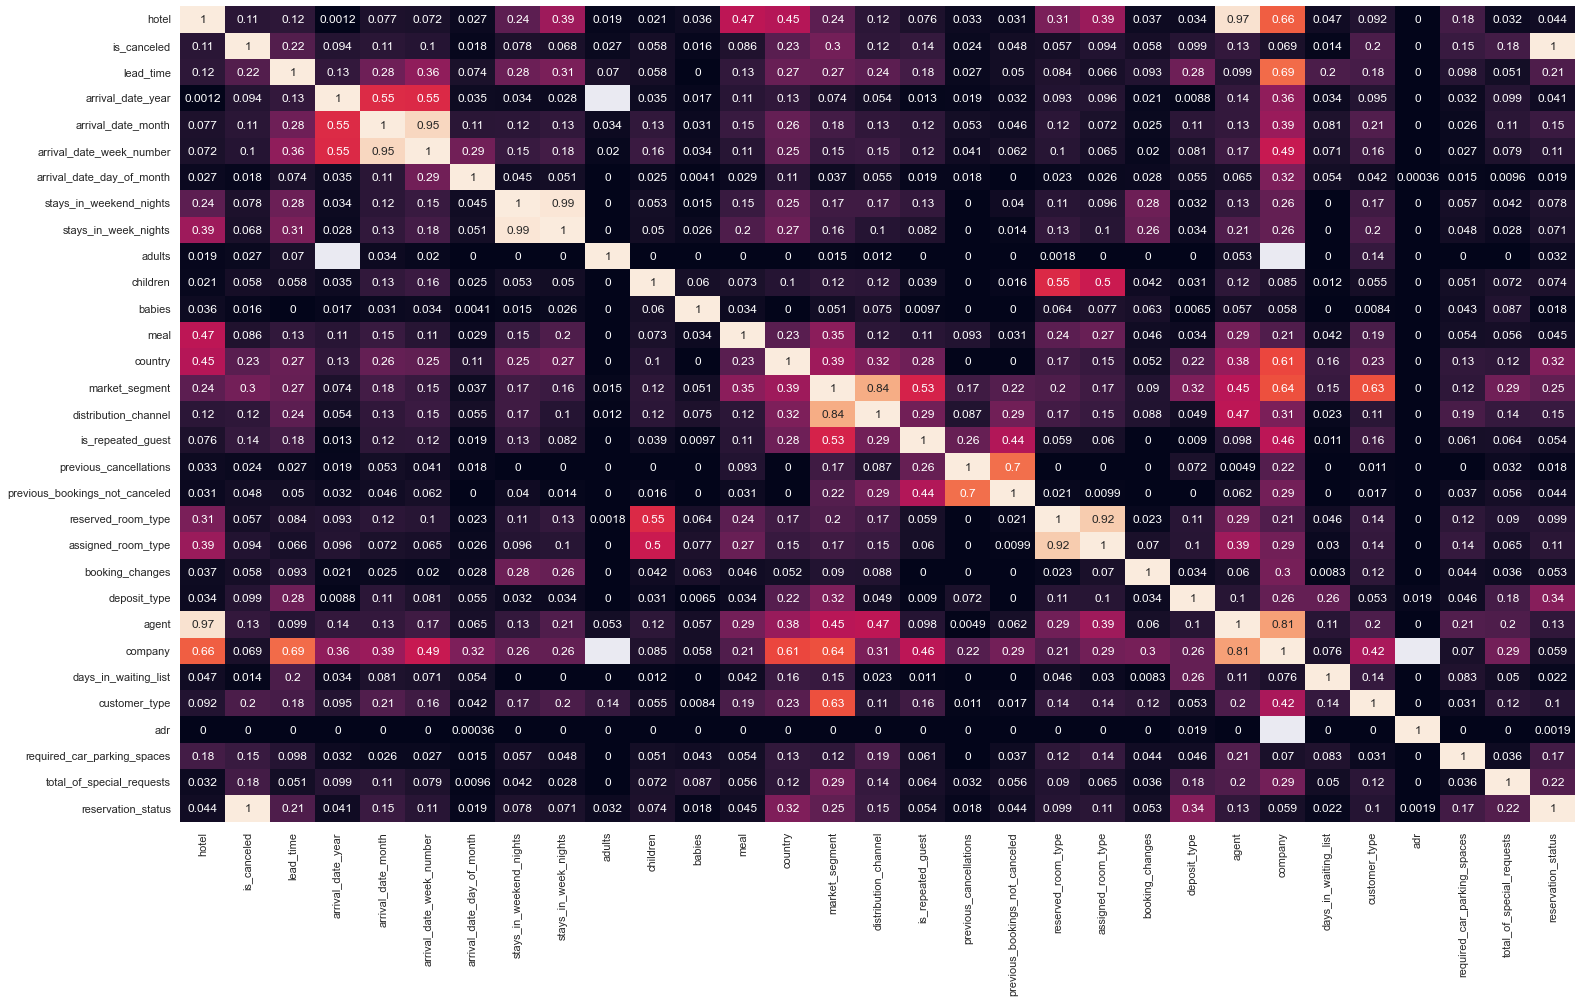

In [332]:
# Feature Correlation
# Setting figure size
fig = plt.figure(figsize = (25, 15))

# Heatmap plotting
sns.heatmap(df.phik_matrix(),
            vmin = 0,
            vmax = 1,
            annot = True,
            cbar = False
)

In [333]:
# Eliminating unnacessary columns
X_train_num.drop(['arrival_date_year', 'arrival_date_day_of_month', 'adults', 'children', 'babies', 'is_repeated_guest',
                  'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
                  'days_in_waiting_list', 'adr', 'total_of_special_requests'], axis = 1, inplace = True)
X_test_num.drop(['arrival_date_year', 'arrival_date_day_of_month', 'adults', 'children', 'babies', 'is_repeated_guest',
                  'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
                  'days_in_waiting_list', 'adr', 'total_of_special_requests'], axis = 1, inplace = True)

In [334]:
# Eliminating unnacessary columns
X_train_cat.drop(['customer_type', 'reservation_status', 'country'], axis = 1, inplace = True)
X_test_cat.drop(['customer_type', 'reservation_status', 'country'], axis = 1, inplace = True)

In [335]:
# Showing numeric columns
X_train_num.head()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,required_car_parking_spaces
73522,39,34,0,2,0
110794,112,17,2,2,0
107296,94,10,0,3,0
15938,75,32,1,5,0
53933,179,27,2,1,0


## **5. Outliers Handling**

In [336]:
# Function to create histogram and boxplot
def diagnostic_plots(X_train_num, variable):
    # Sets figure size
    plt.figure(figsize = (20, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_num[variable], bins = 30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y = X_train_num[variable])
    plt.title('Boxplot')

    plt.show()

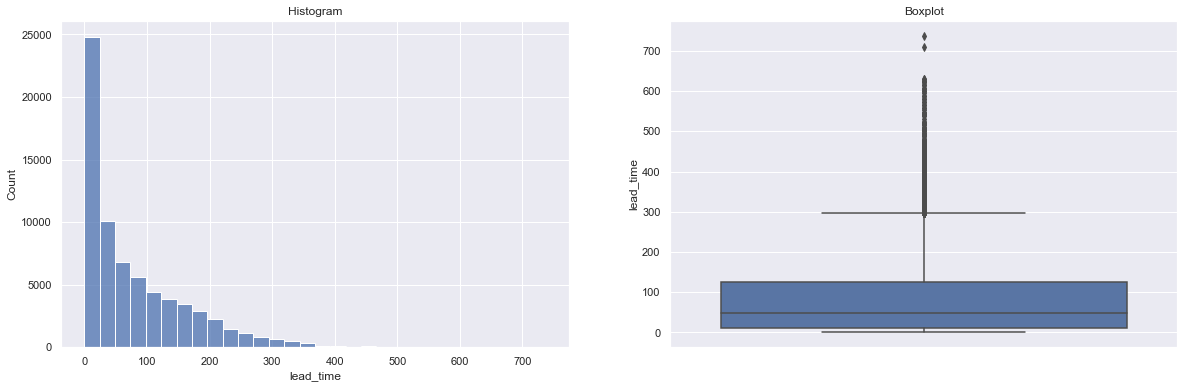


Skewness Value :  1.4365400560550707


In [337]:
# lead_time data distribution
diagnostic_plots(X_train_num, 'lead_time')
print('\nSkewness Value : ', X_train_num['lead_time'].skew())

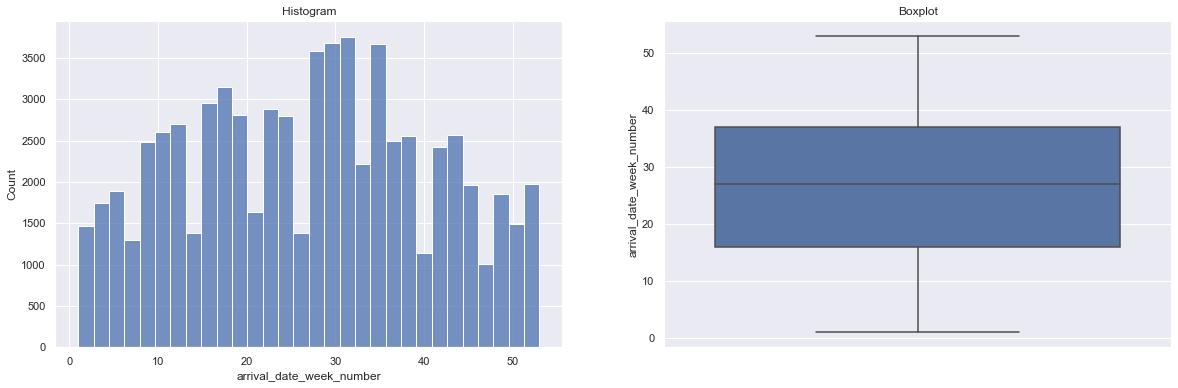


Skewness Value :  0.020380458947911274


In [338]:
# arrival_date_week_number data distribution
diagnostic_plots(X_train_num, 'arrival_date_week_number')
print('\nSkewness Value : ', X_train_num['arrival_date_week_number'].skew())

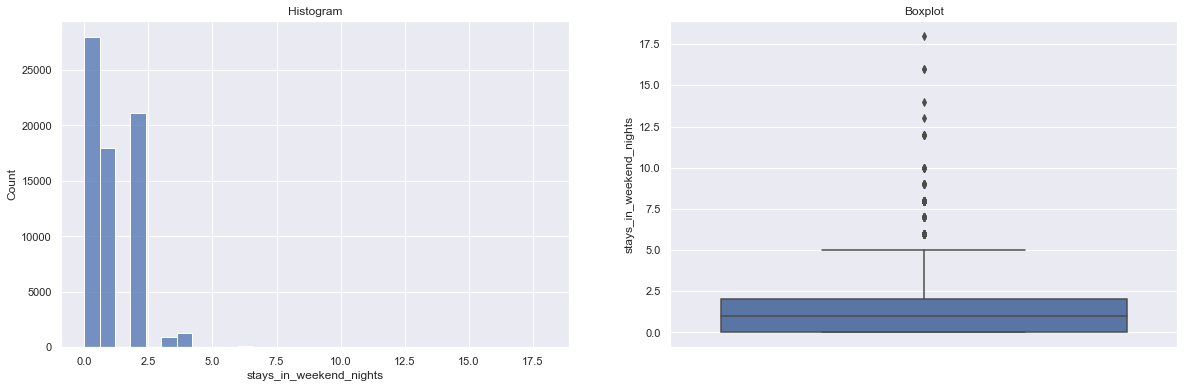


Skewness Value :  1.31788193093836


In [339]:
# stays_in_weekend_nights data distribution
diagnostic_plots(X_train_num, 'stays_in_weekend_nights')
print('\nSkewness Value : ', X_train_num['stays_in_weekend_nights'].skew())

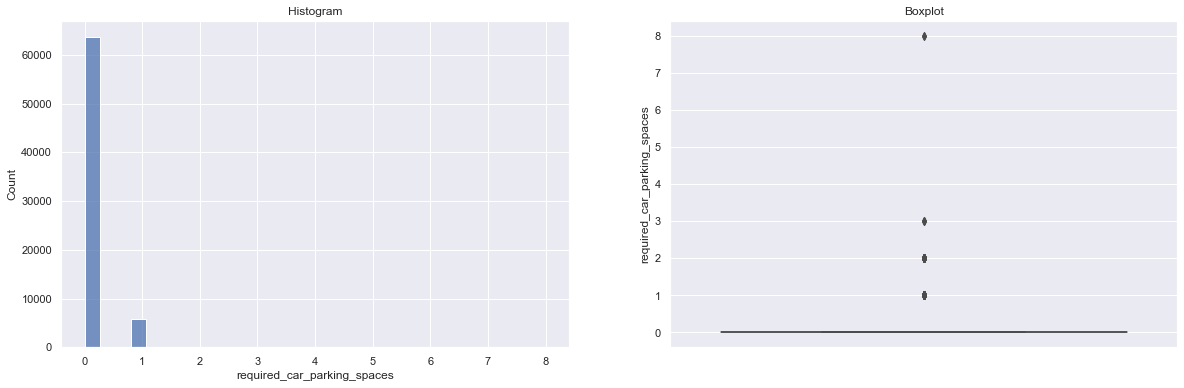


Skewness Value :  3.5936188976092707


In [340]:
# required_car_parking_spaces data distribution
diagnostic_plots(X_train_num, 'required_car_parking_spaces')
print('\nSkewness Value : ', X_train_num['required_car_parking_spaces'].skew())

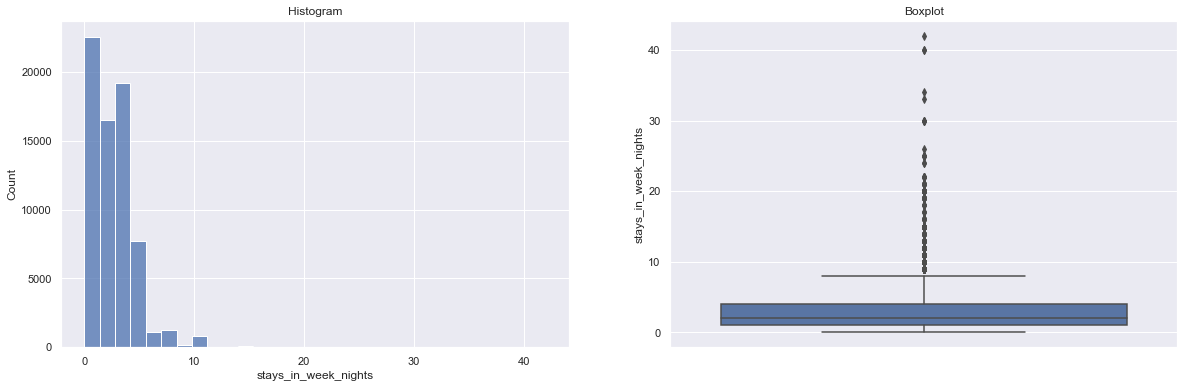


Skewness Value :  2.5314368270685215


In [341]:
# stays_in_week_nights data distribution
diagnostic_plots(X_train_num, 'stays_in_week_nights')
print('\nSkewness Value : ', X_train_num['stays_in_week_nights'].skew())

In [342]:
# Create the capper
windsor = Winsorizer(capping_method='iqr',
                          tail='both',
                          fold=3.0,
                          variables=['required_car_parking_spaces', 'lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights'])

# Fitting the data to be capped
windsor.fit(X_train_num)

# Data transformation
X_train_num_t1 = windsor.transform(X_train_num)

## **6. Feature Scaling**

In [343]:
# Feature Scaling using MinMaxScaler
# Defining scaler function
scaler = MinMaxScaler()
# Fitting the data to be scaled
scaler.fit(X_train_num)

# Data transformation
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Showing scaled data
X_train_num_scaled

array([[0.05291723, 0.63461538, 0.        , 0.04761905, 0.        ],
       [0.15196744, 0.30769231, 0.11111111, 0.04761905, 0.        ],
       [0.1275441 , 0.17307692, 0.        , 0.07142857, 0.        ],
       ...,
       [0.0339213 , 0.98076923, 0.11111111, 0.11904762, 0.        ],
       [0.01356852, 0.34615385, 0.05555556, 0.0952381 , 0.125     ],
       [0.06919946, 0.51923077, 0.05555556, 0.0952381 , 0.        ]])

## **7. Feature Encoding**

In [346]:
# Feature Encoding using Ordinal Encoder
# Defining encoder function
encoder = OrdinalEncoder()
# Fitting the data to be encoded
encoder.fit(X_train_cat)

# Data transformation
X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# Showing encoded data
X_train_cat_encoded

array([[0., 1., 0., ..., 3., 3., 0.],
       [0., 0., 0., ..., 3., 3., 0.],
       [0., 7., 0., ..., 0., 0., 0.],
       ...,
       [1., 2., 0., ..., 0., 0., 0.],
       [1., 8., 0., ..., 0., 0., 0.],
       [1., 5., 0., ..., 0., 0., 0.]])

## **8. Data Merging**

In [347]:
# Data numeric and categorical concatenating
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

# Showing final train data
X_train_final

array([[0.05291723, 0.63461538, 0.        , ..., 3.        , 3.        ,
        0.        ],
       [0.15196744, 0.30769231, 0.11111111, ..., 3.        , 3.        ,
        0.        ],
       [0.1275441 , 0.17307692, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0339213 , 0.98076923, 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       [0.01356852, 0.34615385, 0.05555556, ..., 0.        , 0.        ,
        0.        ],
       [0.06919946, 0.51923077, 0.05555556, ..., 0.        , 0.        ,
        0.        ]])

In [348]:
# Assigning into dataFrame
X_train_final_df = pd.DataFrame(X_train_final)

# Showing final train dataFrame
X_train_final_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.052917,0.634615,0.000000,0.047619,0.0,0.0,1.0,0.0,6.0,3.0,3.0,3.0,0.0
1,0.151967,0.307692,0.111111,0.047619,0.0,0.0,0.0,0.0,3.0,1.0,3.0,3.0,0.0
2,0.127544,0.173077,0.000000,0.071429,0.0,0.0,7.0,0.0,6.0,3.0,0.0,0.0,0.0
3,0.101764,0.596154,0.055556,0.119048,0.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0
4,0.242877,0.500000,0.111111,0.023810,0.0,0.0,5.0,0.0,6.0,3.0,0.0,0.0,0.0


## **9. Imbalanced Data Handling**

In [349]:
# indeces of the columns of categorical variables
smnc = SMOTENC(sampling_strategy='auto', random_state=121, categorical_features=[5, 6, 7, 8, 9, 10, 11, 12])

In [350]:
# Resampling fit
X_train_final_smnc, y_train_smnc = smnc.fit_resample(X_train_final, y_train)

In [351]:
# Showing counter values
counter = Counter(y_train_smnc)
print(counter)

Counter({1: 50571, 0: 50571})


# **IV. MODEL DEVELOPMENT**

## **1. Decision Tree**

In [357]:
# Decision tree model
dt = DecisionTreeClassifier(random_state=42)

In [358]:
# Train the model
dt.fit(X_train_final_smnc, y_train_smnc)

DecisionTreeClassifier(random_state=42)

In [359]:
# Predict Train-Set and Test-Set 
y_pred_train_dt = dt.predict(X_train_final_smnc)
y_pred_test_dt = dt.predict(X_test_final)

In [361]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train_smnc, y_pred_train_dt, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_dt, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     50571
           1       1.00      0.97      0.99     50571

    accuracy                           0.99    101142
   macro avg       0.99      0.99      0.99    101142
weighted avg       0.99      0.99      0.99    101142



========== TEST ==========
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     12643
           1       0.47      0.50      0.49      4752

    accuracy                           0.71     17395
   macro avg       0.64      0.65      0.64     17395
weighted avg       0.72      0.71      0.71     17395



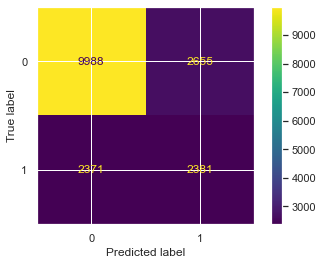

In [362]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_dt, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)

disp.plot()
plt.show()

## **2. Random Forest**

In [363]:
# Random forests model
rf = RandomForestClassifier(random_state=42)

In [364]:
# Model training
rf.fit(X_train_final_smnc, y_train_smnc)

RandomForestClassifier(random_state=42)

In [365]:
# Predict Train-Set and Test-Set 
y_pred_train_rf = rf.predict(X_train_final_smnc)
y_pred_test_rf = rf.predict(X_test_final)

In [367]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train_smnc, y_pred_train_rf, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     50571
           1       0.99      0.98      0.99     50571

    accuracy                           0.99    101142
   macro avg       0.99      0.99      0.99    101142
weighted avg       0.99      0.99      0.99    101142



========== TEST ==========
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12643
           1       0.52      0.51      0.52      4752

    accuracy                           0.74     17395
   macro avg       0.67      0.67      0.67     17395
weighted avg       0.74      0.74      0.74     17395



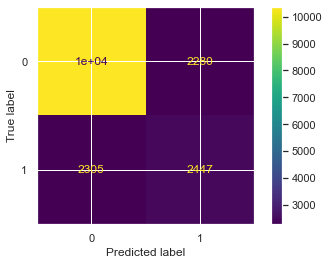

In [368]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_rf, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)

disp.plot()
plt.show()

## **3. Gradient Boosting**

In [370]:
# gradient boost for decision tree model
gb = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.01, n_estimators = 200, random_state = 19)

In [373]:
# Train the model
gb.fit(X_train_final_smnc, y_train_smnc)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=19)

In [374]:
# Predict Train-Set and Test-Set 
y_pred_train_gb = gb.predict(X_train_final_smnc)
y_pred_test_gb = gb.predict(X_test_final)

In [376]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train_smnc, y_pred_train_gb, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_gb, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.77      0.65      0.70     50571
           1       0.69      0.81      0.75     50571

    accuracy                           0.73    101142
   macro avg       0.73      0.73      0.72    101142
weighted avg       0.73      0.73      0.72    101142



========== TEST ==========
              precision    recall  f1-score   support

           0       0.87      0.64      0.74     12643
           1       0.44      0.75      0.55      4752

    accuracy                           0.67     17395
   macro avg       0.66      0.70      0.65     17395
weighted avg       0.75      0.67      0.69     17395



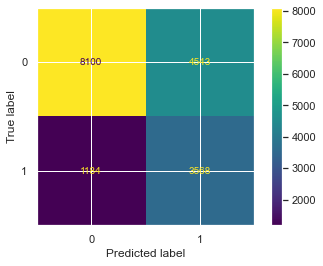

In [377]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_gb, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gb.classes_)

disp.plot()
plt.show()

## **4. Extreme Gradinet Boosting (XGBoost)**

In [378]:
# XGBoost model
xgb = XGBClassifier(max_depth = 3,
                    learning_rate = 0.01,
                    n_estimators = 18,
                    n_jobs = -1,
                    random_state = 42
)

In [379]:
# Training the model
xgb.fit(X_train_final_smnc, y_train_smnc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=18,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [380]:
# Check Pexgbormance Model against Test-Set
y_pred_train_xgb = xgb.predict(X_train_final_smnc)
y_pred_test_xgb = xgb.predict(X_test_final)

In [381]:
# Classification report
print("="*10,"TRAINING","="*10)
print(classification_report(y_train_smnc, y_pred_train_xgb, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_xgb, zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.77      0.64      0.70     50571
           1       0.69      0.81      0.75     50571

    accuracy                           0.72    101142
   macro avg       0.73      0.72      0.72    101142
weighted avg       0.73      0.72      0.72    101142



========== TEST ==========
              precision    recall  f1-score   support

           0       0.87      0.63      0.73     12643
           1       0.44      0.76      0.55      4752

    accuracy                           0.67     17395
   macro avg       0.66      0.69      0.64     17395
weighted avg       0.75      0.67      0.69     17395



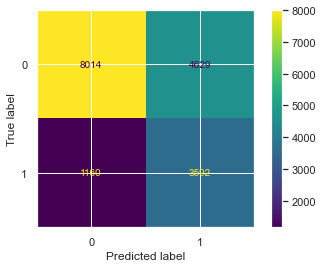

In [382]:
# Confussion matrix
cm = confusion_matrix(y_test, y_pred_test_xgb, labels = xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb.classes_)

disp.plot()
plt.show()

## **6. Summaries**

| Metric            |  Decision Tree  |   Random Forest  |   Gradient Boosting   |   XGBoost  |
| :---              |        :----:   |       :---:      |           :---:       |    :---:   |
| Accuracy Train    | 0.99            | 0.99             | 0.73                  | 0.72       |
| Accuracy Test     | 0.71            | 0.74             | 0.67 (70)             | 0.67       |

# **V. MODEL IMPROVEMENT**

In [388]:
# Setting hyperparameter
n_estimators = [80, 90, 100, 110]
learning_rate = [0.15, 0.2, 0.25]
max_depth = [1, 2, 3]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [2, 3, 4]
min_samples_leaf = [7, 8, 9]
gb_param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': [39]}
gb_param_grid

{'n_estimators': [80, 90, 100, 110],
 'learning_rate': [0.15, 0.2, 0.25],
 'max_depth': [1, 2, 3],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [7, 8, 9],
 'random_state': [39]}

In [391]:
# Defining grid search
gb_randcv = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                      param_distributions = gb_param_grid,
                      cv = 3,
                      n_jobs = -1
)

In [392]:
# Fitting grid search
gb_randcv.fit(X_train_final_smnc, y_train_smnc)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.15, 0.2, 0.25],
                                        'max_depth': [1, 2, 3],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [7, 8, 9],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [80, 90, 100, 110],
                                        'random_state': [39]})

In [393]:
# Get Best Hyperparameters
gb_randcv.best_params_

{'random_state': 39,
 'n_estimators': 110,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 3,
 'learning_rate': 0.2}

In [394]:
# Get Best Estimator
gb_randcv_best = gb_randcv.best_estimator_

In [395]:
# Check Performance Model against Test-Set
y_pred_test_gb_randcv = gb_randcv_best.predict(X_test_final)

In [396]:
# Classification report
print(classification_report(y_test, y_pred_test_gb_randcv))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77     12643
           1       0.47      0.74      0.57      4752

    accuracy                           0.70     17395
   macro avg       0.67      0.71      0.67     17395
weighted avg       0.76      0.70      0.71     17395



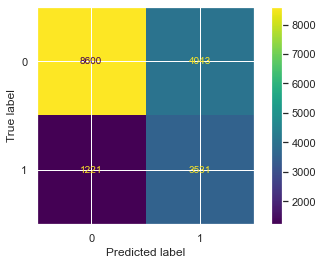

In [397]:
# Confussion matrix
print(ConfusionMatrixDisplay.from_estimator(gb_randcv_best, X_test_final, y_test))

# **VI. MODEL INFERENCE**

In [399]:
num_col = X_train_num.columns.values
cat_col = X_train_cat.columns.values

num_pipe = Pipeline([
    ('outlier', windsor),
    ('scaling', scaler)
])

cat_pipe = Pipeline([
    ('encoding', encoder)
])

preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, num_col),
    ('cat', cat_pipe, cat_col)
])

pipe = Pipeline([('preprocessing', preprocess), ('classifier', gb_randcv_best)], memory='cache_folder')

In [401]:
pipe.fit(X_train, y_train)

Pipeline(memory='cache_folder',
         steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=3.0,
                                                                              tail='both',
                                                                              variables=['required_car_parking_spaces',
                                                                                         'lead_time',
                                                                                         'arrival_date_week_number',
                                                                                         'stays_in_weekend_nights',
                                                                                         'stays_in_week_nights'])),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  array(['lead_ti...
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder())]),
                                                  array(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type'], dtype=object))])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            max_features='sqrt',
                                            min_samples_leaf=8,
                                            min_samples_split=4,
                                            n_estimators=110,
                                            random_state=39))])

In [402]:
pipe.predict(df_inf)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# **VII. CONCLUSION**

The cancellation prediction process compares several tree-based classification models and ensemble learning. The models include decision trees, random forests, gradient boosting, and XGBoost. Based on the modeling results, the decision tree and random forest are the models with the worst performance. Although the trained model has high accuracy, the test model has very low accuracy. Overfitting on these two models occurs. Then the other two models which are sequential ensemble learning based, namely gradient boosting and XGBoost have better performance. Although the accuracy of the model is low, there is no overfitting. The difference between the two is not that significant, but the gradient boosting is slightly better. Then, the improved model is carried out using random search hyperparameter tuning to the gradient boosting model. The results are pretty good. The accuracy of the testing model has increased.